# Predicting ‘Class’

### 1)	Out of all the 30 independent input variables, find the variables that are most useful in predicting ‘Class’.
### 2)	Try implementing PCA (whether it is useful or not) to reduce no. of independent variables.
### 3)	Draft the following classification models to predict ‘Class’: Logistic regression, SVC, Decision Tree Classifier. Write a detailed explanation of each of the models.


## Importing the  Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report 



# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading the data file

In [2]:
df = pd.read_csv("creditcard.csv")

# Understanding the dataset 

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

print("No.of Rows :",df.shape[0])
print("No.of Columns :",df.shape[1])
print("Size of the dataframe : ",df.shape)

No.of Rows : 284807
No.of Columns : 31
Size of the dataframe :  (284807, 31)


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

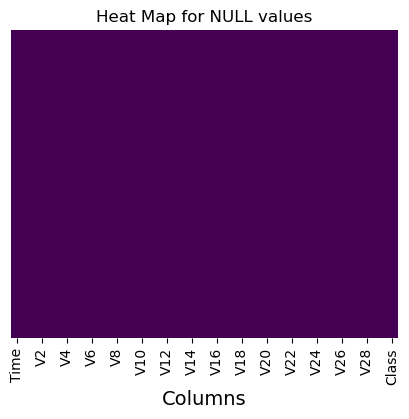

In [6]:
# checking for the null values 
plt.figure(figsize=(5, 4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heat Map for NULL values")
plt.xlabel("Columns", fontsize=14)
plt.show()

In [7]:
# Count of Duplicates
print("Count of Duplicates : ",df.duplicated().sum())

Count of Duplicates :  1081


In [8]:
df = df.drop_duplicates()
df.shape

(283726, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [11]:
# Identify the class count

Classes = df["Class"].value_counts()
print(Classes)

Class
0    283253
1       473
Name: count, dtype: int64


In [12]:
# Class distribution percentage 

other_class = (Classes[0]/df["Class"].count())*100
fraud_class = (Classes[1]/df["Class"].count())*100

print("Other Class : ",other_class)
print("Fraud Class : ",fraud_class)


Other Class :  99.83328986416473
Fraud Class :  0.1667101358352777


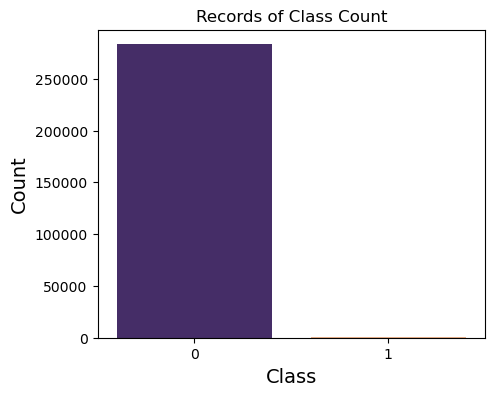

In [13]:
# Plot for the class Count 

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x="Class", palette=['#432371', '#FAAE7B'])
plt.title("Records of Class Count")
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


In [14]:
#  Function for Ploting the multiple histogram plot to indentify the data distribution


columns = df.columns.to_list()

def histogram_plot(dataframe,columns_names):
    num_columns = len(columns_names)
    num_rows = (num_columns + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))
    fig.subplots_adjust(hspace=0.5)
    for i, col_name in enumerate(columns_names):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        sns.histplot(data=dataframe, x=col_name, ax=ax)
        ax.set_xlabel(col_name, fontsize=14)
        
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1, -1])
    plt.show()

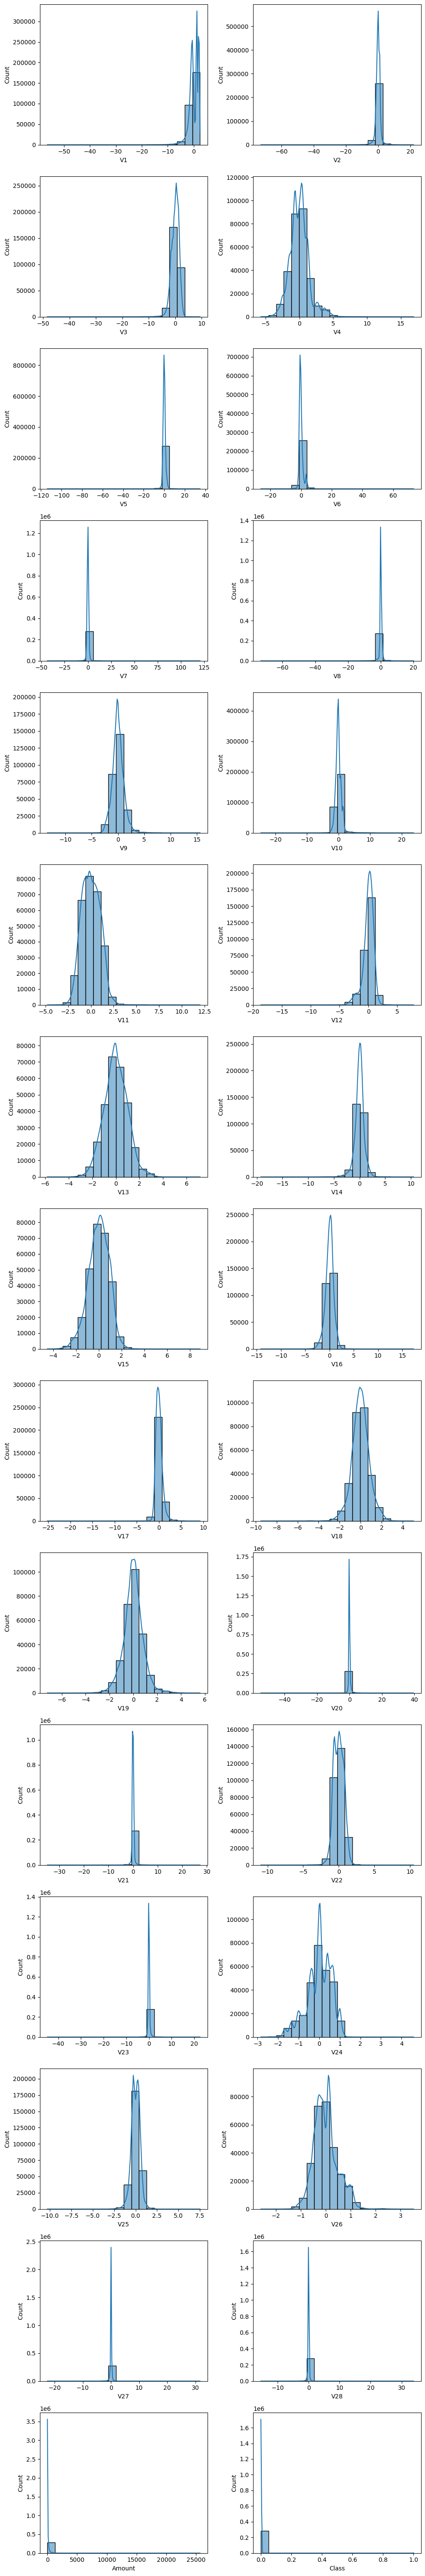

In [15]:

col =['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
      'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Class'] 

def subplots_his(columns,dataframe):
    #size = len(columns) // 2
    num_columns = len(columns)
    size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(data=dataframe, x=col, kde=True,bins=20,edgecolor='black',ax=axes[i])
    
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])
        
    plt.tight_layout()
    plt.show()
    

subplots_his(col, df)

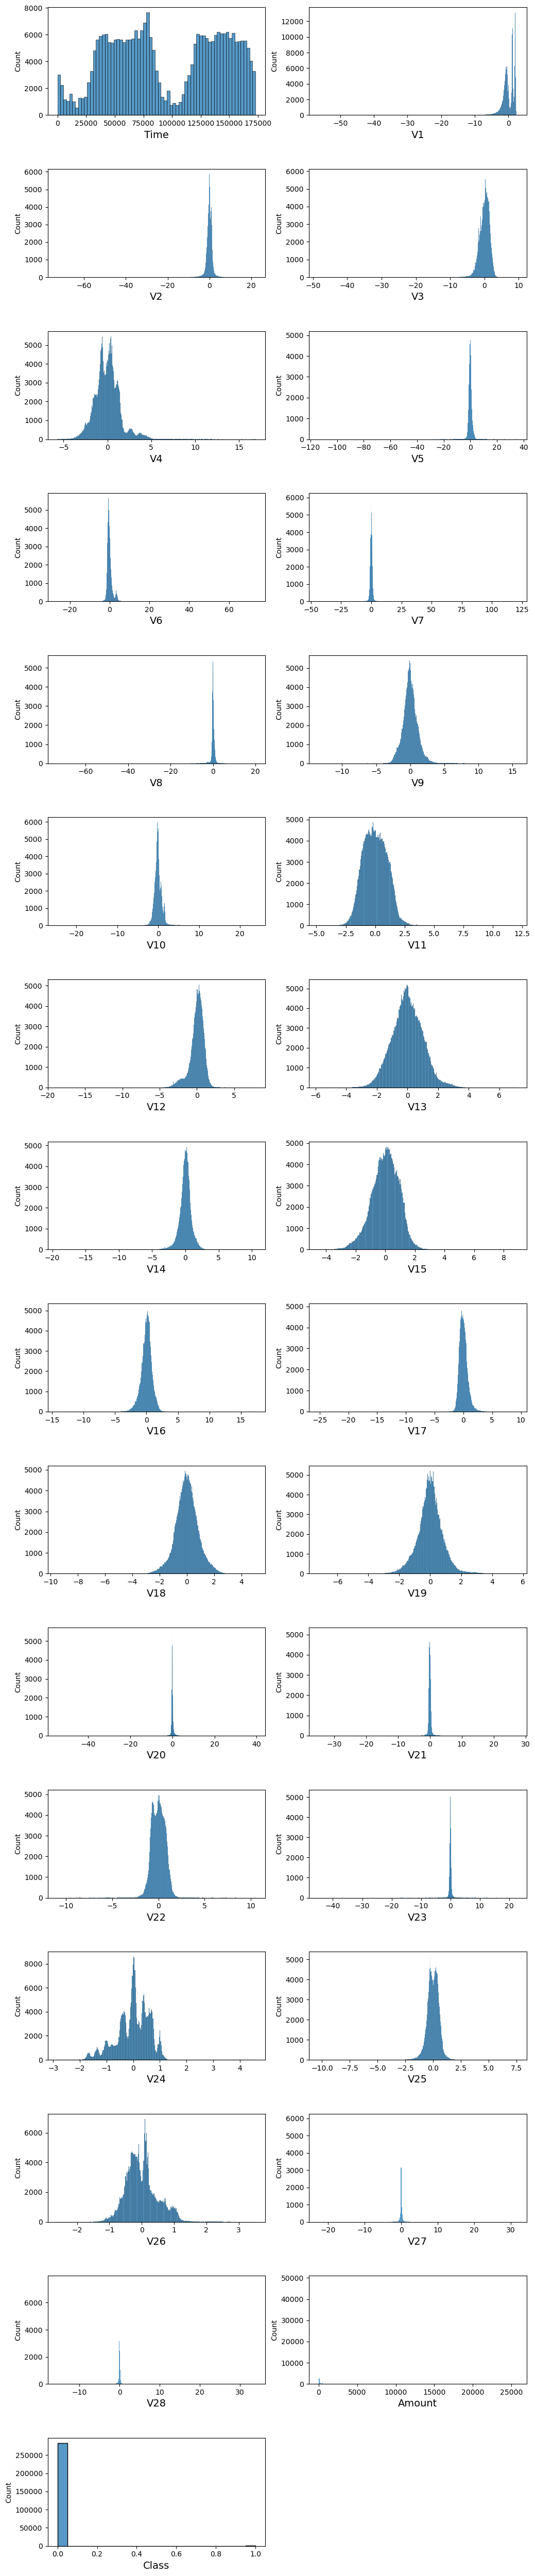

In [16]:
# Calling teh histogram fuction for ploting 
histogram_plot(df,columns)

# Feature Scaling 

In [17]:
# scaling the Amount column 
sc = StandardScaler()
df["Amount"] = sc.fit_transform(pd.DataFrame(df["Amount"]))
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


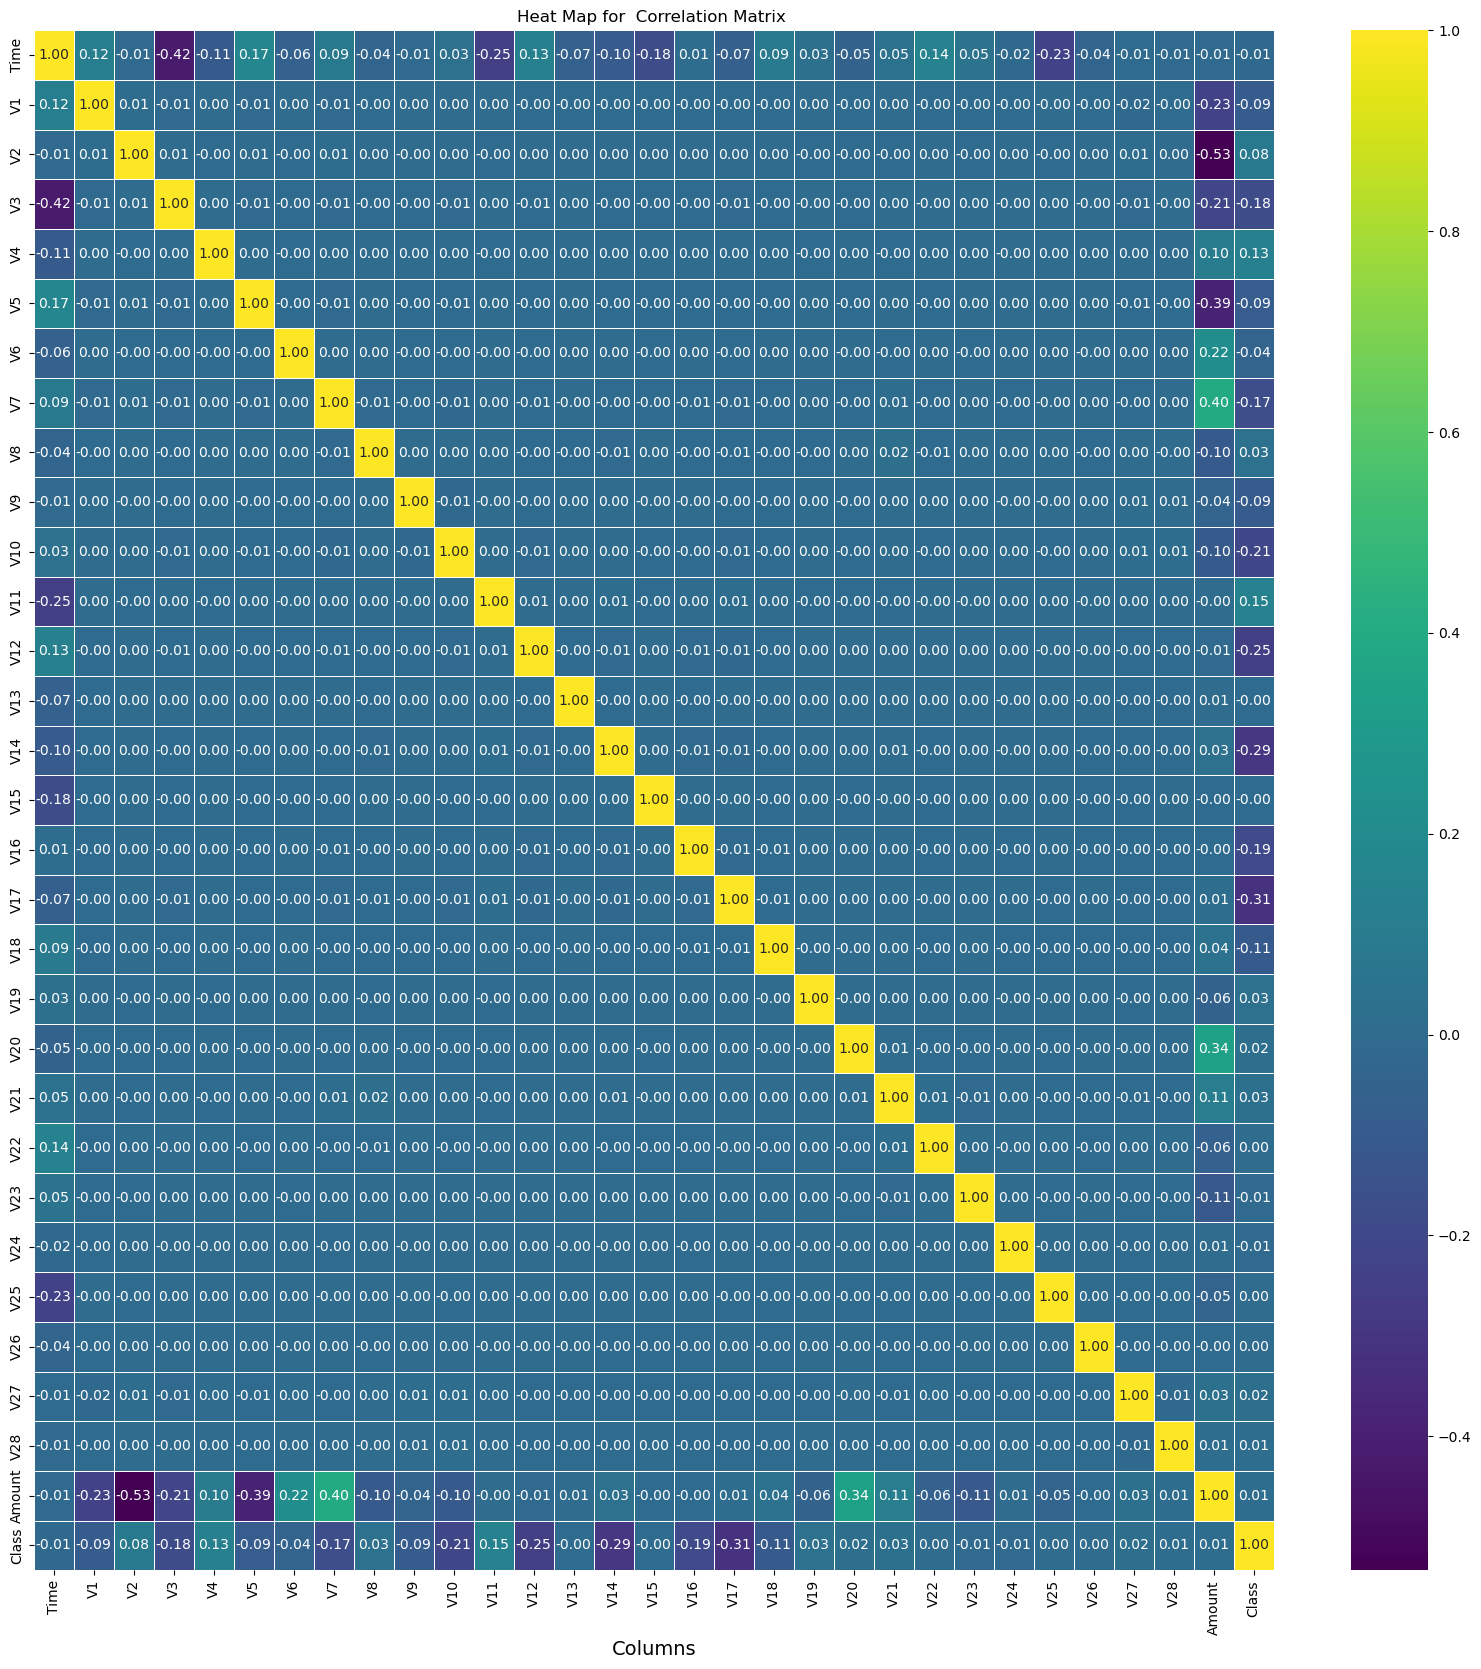

In [18]:
# Creating a corre;ation matrix

corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True,cmap='viridis',linewidth=.5,fmt='.2f')
plt.title("Heat Map for  Correlation Matrix ")
plt.xlabel("Columns", fontsize=14)
plt.show()

In [19]:
data = df.drop(["Time"],axis = 1)

In [20]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [21]:
data = data.drop_duplicates()

In [22]:
data.shape

(275663, 30)

# Without Handling the imbalanced dataset

 ### Dividing the Feature dataset and the Predicting daaset 

In [23]:
Feature_dataset = data.drop("Class",axis=1)
Predict_dataset = data["Class"]

print("feature_dataset : ",Feature_dataset.shape)
print("predict_dataset : ",Predict_dataset.shape)

feature_dataset :  (275663, 29)
predict_dataset :  (275663,)


### Spliting the dataset into Training Set and Test set 

In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

### Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_predict = log.predict(x_test)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

# Accuracy
Accuracy_score1=accuracy_score(y_test,y_predict)

# Precison_score
Precision_score1=precision_score(y_test,y_predict)

# Recall
Recall_score1=recall_score(y_test,y_predict)

# F1
F1_score1 =f1_score(y_test,y_predict)


print("Accuracy_score :",Accuracy_score1)
print("Precision_score",Precision_score1)
print("Recall_score :",Recall_score1)
print("F1_score",F1_score1)

Accuracy_score : 0.9473684210526315
Precision_score 0.9893617021276596
Recall_score : 0.9117647058823529
F1_score 0.9489795918367346


In [80]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        88
           1       0.99      0.91      0.95       102

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



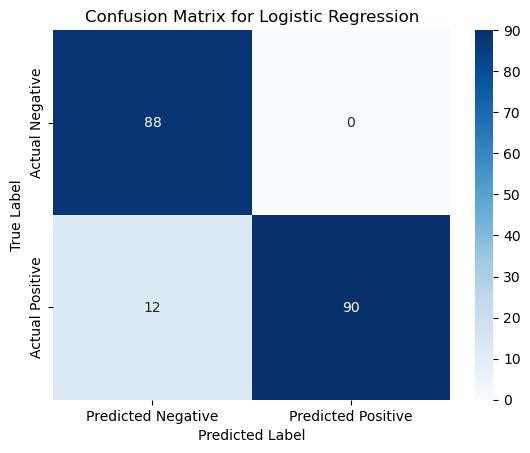

In [81]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### Decission Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [93]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
y_predict2 = dt.predict(x_test)

In [95]:
from sklearn.metrics import precision_score,recall_score,f1_score

Accuracy_score2=accuracy_score(y_test,y_predict2)

Precision_score2=precision_score(y_test,y_predict2)

Recall_score2=recall_score(y_test,y_predict2)

F1_score2 =f1_score(y_test,y_predict2)


print("Accuracy_score2 :",Accuracy_score2)
print("Precision_score2",Precision_score2)
print("Recall_score2 :",Recall_score2)
print("F1_score2",F1_score2)

Accuracy_score2 : 0.9315789473684211
Precision_score2 0.9587628865979382
Recall_score2 : 0.9117647058823529
F1_score2 0.9346733668341709


In [96]:
print(classification_report(y_test, y_predict2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



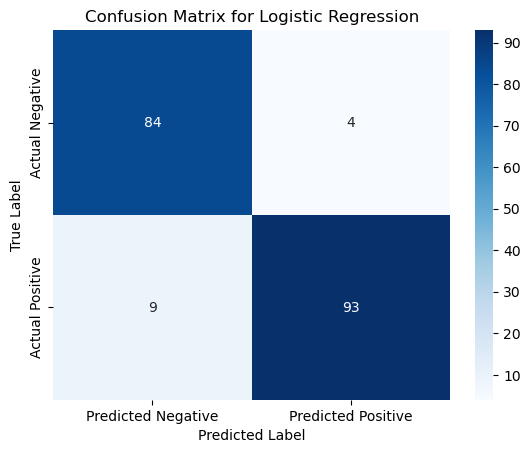

In [97]:
cm = confusion_matrix(y_test, y_predict2)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### SVC

In [34]:
from sklearn.svm import SVC
svc= SVC()

In [35]:
svc.fit(x_train, y_train)

SVC()

In [106]:
y_predict3 = svc.predict(x_test)

In [107]:
from sklearn.metrics import precision_score,recall_score,f1_score

Accuracy_score3=accuracy_score(y_test,y_predict3)

Precision_score3=precision_score(y_test,y_predict3)

Recall_score3=recall_score(y_test,y_predict3)

F1_score3 =f1_score(y_test,y_predict3)


print("Accuracy_score3 :",Accuracy_score3)
print("Precision_score3",Precision_score3)
print("Recall_score3 :",Recall_score3)
print("F1_score3",F1_score3)

Accuracy_score3 : 0.9368421052631579
Precision_score3 1.0
Recall_score3 : 0.8823529411764706
F1_score3 0.9375


In [108]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        88
           1       1.00      0.88      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



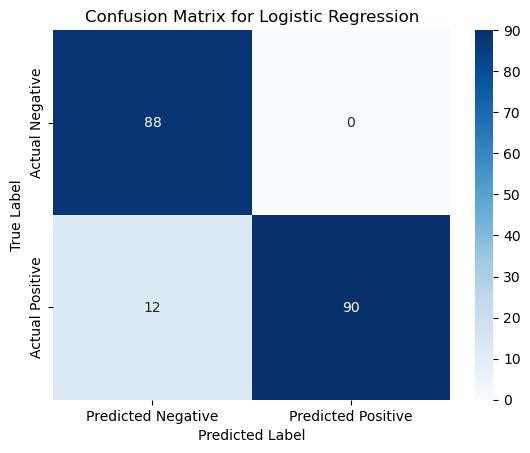

In [109]:
cm = confusion_matrix(y_test,y_predict3)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

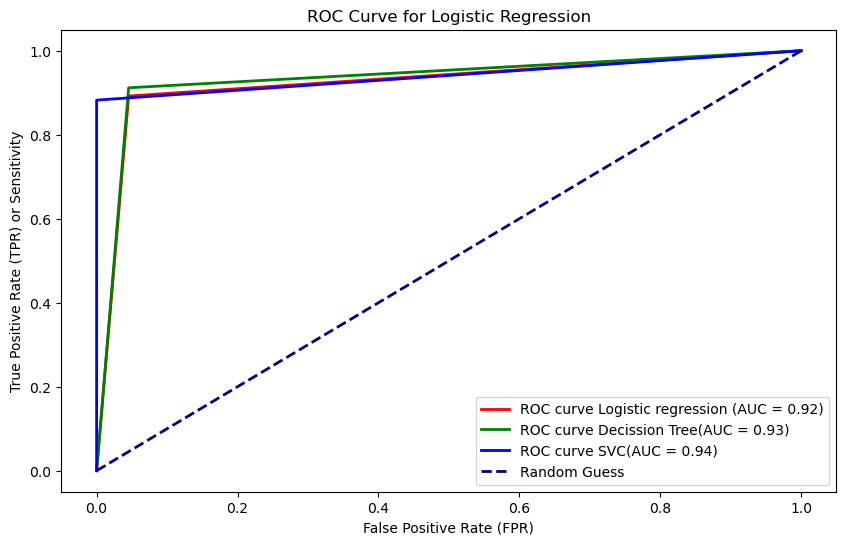

In [112]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict2)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_predict3)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve Logistic regression (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr1, tpr1, color='green', lw=2, label='ROC curve Decission Tree(AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve SVC(AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [113]:
Accuracy_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Accuracy" :[Accuracy_score1*100,
                                       Accuracy_score2*100,
                                        Accuracy_score3*100]})

In [114]:
Precision_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Precision_Score" :[Precision_score1*100,
                                       Precision_score2*100,
                                                Precision_score3*100
                                              ]})

In [115]:
Recall_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Recall_Score" :[Recall_score1*100,
                                       Recall_score2*100,
                                           Recall_score3*100]})

In [116]:
F1_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "F1_score_Score" :[F1_score1*100,
                                       F1_score2*100,
                                             F1_score3*100]})

In [117]:
Scores_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                         "Accuracy_Score" :[Accuracy_score1*100,
                                       Accuracy_score2*100,
                                            Accuracy_score3*100],
                         "Precision_Score" :[Precision_score1*100,
                                       Precision_score2*100,
                                             Precision_score3*100],
                         "Recall_Score" :[Recall_score1*100,
                                       Recall_score2*100,
                                         Recall_score3*100],
                         "F1_score_Score" :[F1_score1*100,
                                       F1_score2*100,
                                           F1_score3*100]})
                         
Scores_df

,Models,Accuracy_Score,Precision_Score,Recall_Score,F1_score_Score
0,LR,92.105263,95.789474,89.215686,92.385787
1,DT,93.157895,95.876289,91.176471,93.467337
2,SVC,93.684211,100.000000,88.235294,93.750000


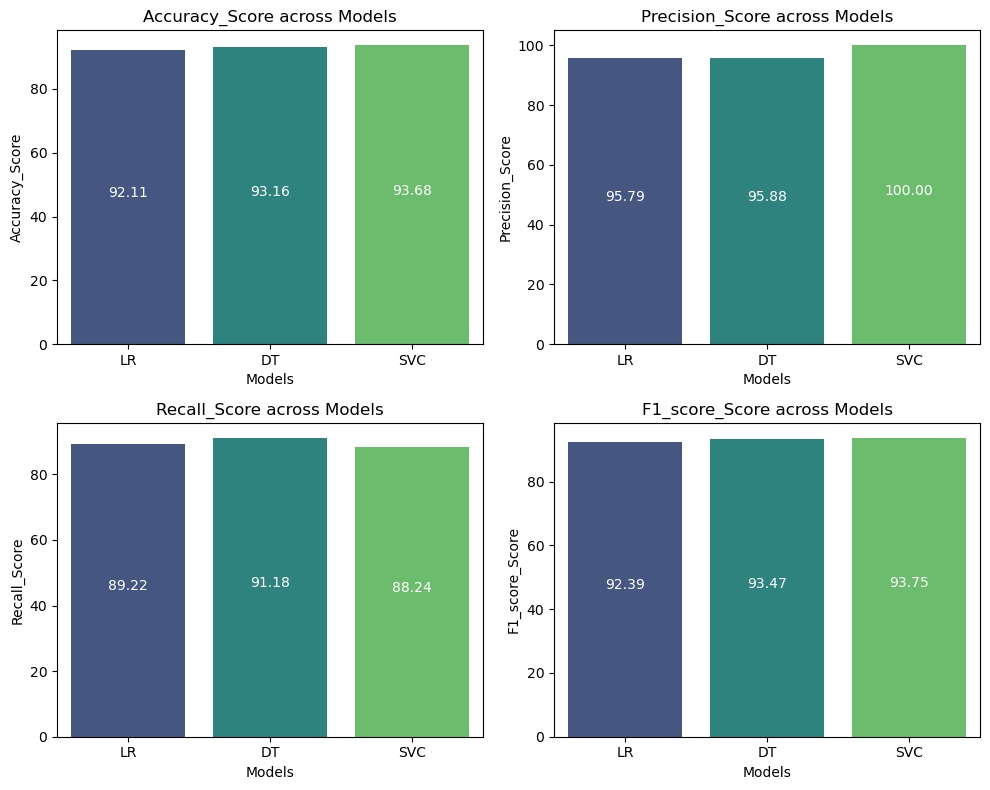

In [118]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
metrics = ['Accuracy_Score', 'Precision_Score', 'Recall_Score', 'F1_score_Score']
for i, metric in enumerate(metrics):
    sns.barplot(x='Models', y=metric, data=Scores_df, ax=axes[i], palette='viridis',fill=True)
    axes[i].set_title(f'{metric} across Models')
    for j, value in enumerate(Scores_df[metric]):
        axes[i].text(j, value / 2, f'{value:.2f}', ha='center', color='white')

plt.tight_layout()
plt.show()

#### Inferences:

All three models (LR, DT, SVC) demonstrate relatively high accuracy, ranging from 92.11% to 93.68%.
Precision scores for all models are relatively high, indicating a low rate of false positives.
The Decision Tree and Support Vector Classifier show higher recall scores compared to Logistic Regression, suggesting they are better at capturing true positive instances.
The Support Vector Classifier has a perfect precision score (100%), which means it didn't classify any instances as positive unless it was certain. However, this comes at the cost of a slightly lower recall score compared to the Decision Tree

# Handling the imbalanced dataset

Two types for handling the dataset
1. Undersampling  -> 
2.Oversampling

### Undersampling

In [120]:
normal_dataset = data[data["Class"] == 0]
fraud_dataset = data[data["Class"] == 1]

In [121]:
normal_dataset.shape

(275190, 30)

In [122]:
fraud_dataset.shape

(473, 30)

In [123]:
# randomly selecting the normal datasamples form the normal dataset 
sample_normal = normal_dataset.sample(n=473)
sample_normal.shape

(473, 30)

In [124]:
new_df = pd.concat([sample_normal,fraud_dataset],ignore_index=True)
new_df.shape

(946, 30)

In [125]:
# Identify the class count

Classes = new_df["Class"].value_counts()
print(Classes)

Class
0    473
1    473
Name: count, dtype: int64


In [126]:
# Class distribution percentage 

other_class = (Classes[0]/new_df["Class"].count())*100
fraud_class = (Classes[1]/new_df["Class"].count())*100

print("Other Class : ",other_class)
print("Fraud Class : ",fraud_class)


Other Class :  50.0
Fraud Class :  50.0


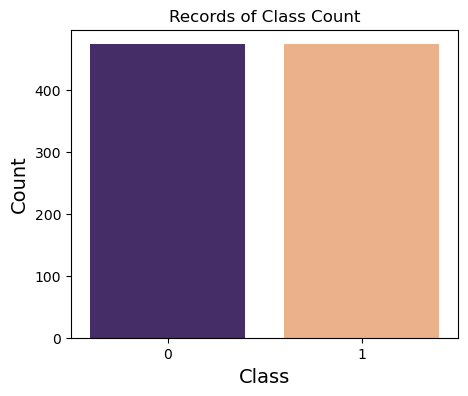

In [127]:
# Plot for the class Count 

plt.figure(figsize=(5, 4))
sns.countplot(data=new_df, x="Class", palette=['#432371', '#FAAE7B'])
plt.title("Records of Class Count")
plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()


 ### Dividing the Feature dataset and the Predicting daaset 

In [128]:
Feature_dataset = new_df.drop("Class",axis=1)
Predict_dataset = new_df["Class"]

 ### Spliting the dataset into Training Set and Test set 

In [129]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

## Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [153]:
y_predict = log.predict(x_test)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:


Accuracy_score1=accuracy_score(y_test,y_predict)

Precision_score1=precision_score(y_test,y_predict)

Recall_score1=recall_score(y_test,y_predict)

F1_score1 =f1_score(y_test,y_predict)


print("Accuracy_score1 :",Accuracy_score1)
print("Precision_score1",Precision_score1)
print("Recall_score1 :",Recall_score1)
print("F1_score1",F1_score1)

Accuracy_score1 : 0.968421052631579
Precision_score1 1.0
Recall_score1 : 0.9411764705882353
F1_score1 0.9696969696969697


In [156]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        88
           1       1.00      0.94      0.97       102

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



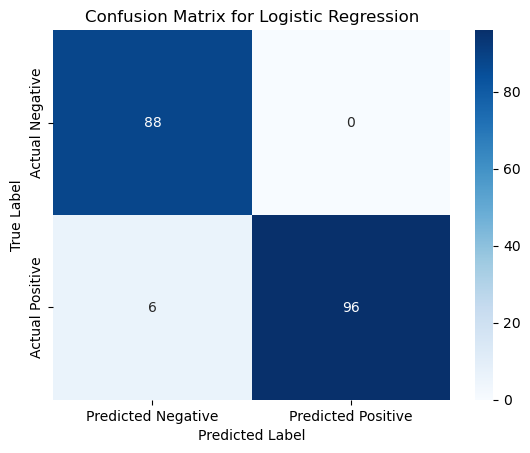

In [157]:
cm = confusion_matrix(y_test,y_predict)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [159]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [160]:
y_predict1 = dt.predict(x_test)

In [161]:
from sklearn.metrics import precision_score,recall_score,f1_score

Accuracy_score2=accuracy_score(y_test,y_predict1)

Precision_score2=precision_score(y_test,y_predict1)

Recall_score2=recall_score(y_test,y_predict1)

F1_score2 =f1_score(y_test,y_predict1)


print("Accuracy_score2 :",Accuracy_score2)
print("Precision_score2",Precision_score2)
print("Recall_score2 :",Recall_score2)
print("F1_score2",F1_score2)

Accuracy_score2 : 0.9263157894736842
Precision_score2 0.94
Recall_score2 : 0.9215686274509803
F1_score2 0.9306930693069307


In [162]:
print(classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        88
           1       0.94      0.92      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



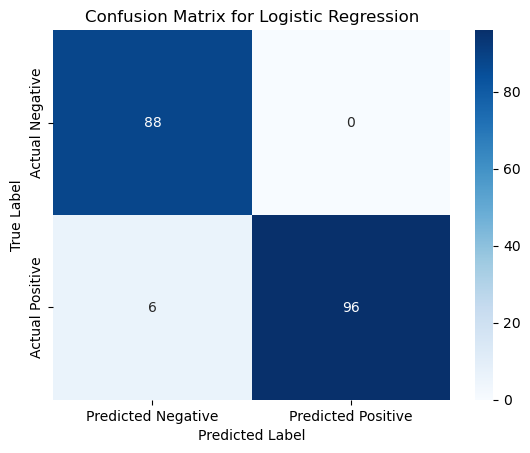

In [163]:
cm = confusion_matrix(y_test,y_predict)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

### SVC

In [164]:
svc.fit(x_train, y_train)

SVC()

In [165]:
y_pred = svc.predict(x_test)

In [166]:
from sklearn.metrics import precision_score,recall_score,f1_score

Accuracy_score3=accuracy_score(y_test,y_pred)

Precision_score3=precision_score(y_test,y_pred)

Recall_score3=recall_score(y_test,y_pred)

F1_score3 =f1_score(y_test,y_pred)


print("Accuracy_score3 :",Accuracy_score3)
print("Precision_score3",Precision_score3)
print("Recall_score3 :",Recall_score3)
print("F1_score3",F1_score3)

Accuracy_score3 : 0.9368421052631579
Precision_score3 0.9891304347826086
Recall_score3 : 0.8921568627450981
F1_score3 0.9381443298969072


In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        88
           1       0.99      0.89      0.94       102

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



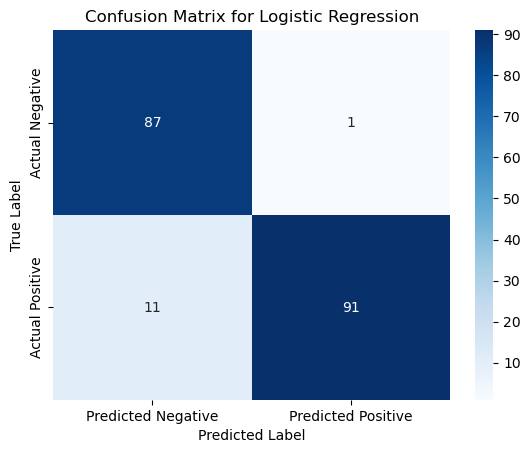

In [168]:
cm = confusion_matrix(y_test,y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [169]:
Accuracy_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Accuracy" :[Accuracy_score1*100,
                                       Accuracy_score2*100,
                                        Accuracy_score3*100]})

In [170]:
Precision_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Precision_Score" :[Precision_score1*100,
                                       Precision_score2*100,
                                                Precision_score3*100
                                              ]})

In [171]:
Recall_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "Recall_Score" :[Recall_score1*100,
                                       Recall_score2*100,
                                           Recall_score3*100]})

In [172]:
F1_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                           "F1_score_Score" :[F1_score1*100,
                                       F1_score2*100,
                                             F1_score3*100]})

In [173]:
Scores_df = pd.DataFrame({"Models":["LR","DT","SVC"],
                         "Accuracy_Score" :[Accuracy_score1*100,
                                       Accuracy_score2*100,
                                            Accuracy_score3*100],
                         "Precision_Score" :[Precision_score1*100,
                                       Precision_score2*100,
                                             Precision_score3*100],
                         "Recall_Score" :[Recall_score1*100,
                                       Recall_score2*100,
                                         Recall_score3*100],
                         "F1_score_Score" :[F1_score1*100,
                                       F1_score2*100,
                                           F1_score3*100]})
                         
Scores_df

,Models,Accuracy_Score,Precision_Score,Recall_Score,F1_score_Score
0,LR,96.842105,100.000000,94.117647,96.969697
1,DT,92.631579,94.000000,92.156863,93.069307
2,SVC,93.684211,98.913043,89.215686,93.814433


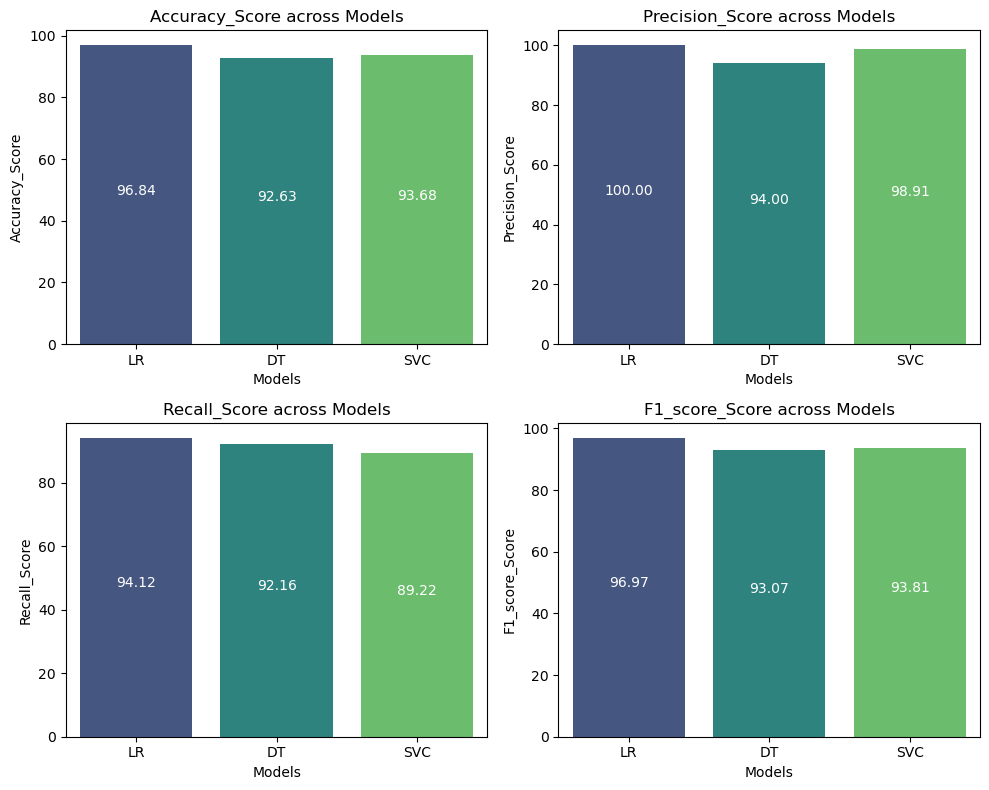

In [174]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()
metrics = ['Accuracy_Score', 'Precision_Score', 'Recall_Score', 'F1_score_Score']
for i, metric in enumerate(metrics):
    sns.barplot(x='Models', y=metric, data=Scores_df, ax=axes[i], palette='viridis',fill=True)
    axes[i].set_title(f'{metric} across Models')
    for j, value in enumerate(Scores_df[metric]):
        axes[i].text(j, value / 2, f'{value:.2f}', ha='center', color='white')

plt.tight_layout()
plt.show()

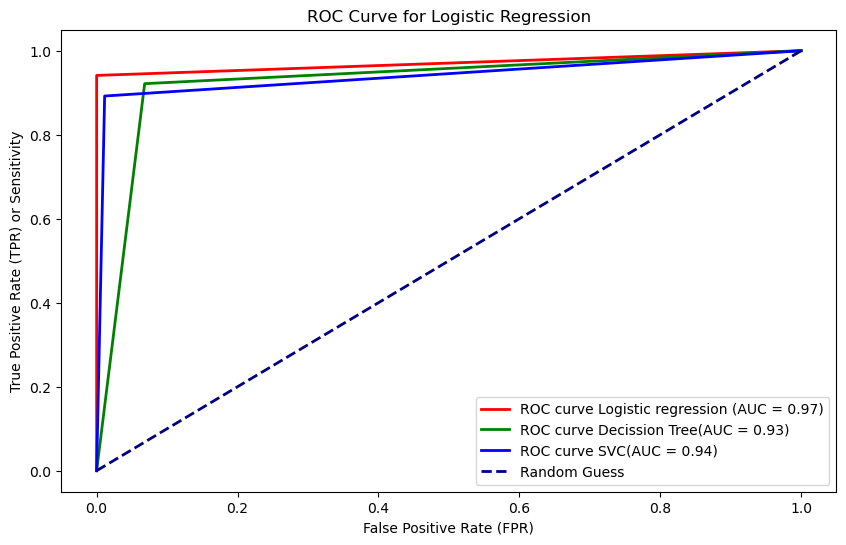

In [175]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict1)
fpr2, tpr2, thresholds2 = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve Logistic regression (AUC = {:.2f})'.format(roc_auc))
plt.plot(fpr1, tpr1, color='green', lw=2, label='ROC curve Decission Tree(AUC = {:.2f})'.format(roc_auc1))
plt.plot(fpr2, tpr2, color='blue', lw=2, label='ROC curve SVC(AUC = {:.2f})'.format(roc_auc2))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Sensitivity')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

#### Inferences:

The Logistic Regression model achieves the highest accuracy at 96.84% and perfect precision, indicating that it doesn't classify any instances as positive unless it is certain. This model also achieves a good balance between precision and recall, as reflected in the high F1 score.

The Decision Tree model shows a slightly lower accuracy compared to Logistic Regression but maintains good precision, recall, and F1 score. It seems to generalize well to new data.

The Support Vector Classifier achieves high precision, indicating a low rate of false positives. However, the recall is relatively lower compared to Logistic Regression and Decision Tree, resulting in a slightly lower F1 score.